<a href="https://colab.research.google.com/github/minhyuk0914/DL_study/blob/main/cnn_filters%20%2B%20ml%20classifier/cnn_filters%2Bml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN_filters + ml
> * Quiz : 이미지를 10가지 항목으로 분류    
* data : fashion_mnist   
* 평가지표 : accuracy_score()

### keras upgrade

In [1]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 22.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [2]:
# keras 에러 방지
import os

os.environ['KERAS_BACKEND'] = 'tensorflow'

### Library import

In [3]:
import random
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *

import keras
from keras.backend import clear_session
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten

In [4]:
keras.__version__

'3.1.1'

### Set Random_seed

In [5]:
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

### Data Load

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
# y - unique
class_n = np.unique(y_train)
class_n

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
labels = {0 : 'T-shirt/top',
          1 : 'Trouser',
          2 : 'Pullover',
          3 : 'Dress',
          4 : 'Coat',
          5 : 'Sandal',
          6 : 'Shirt',
          7 : 'Sneaker',
          8 : 'Bag',
          9 : 'Ankle boot' }

print(labels)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

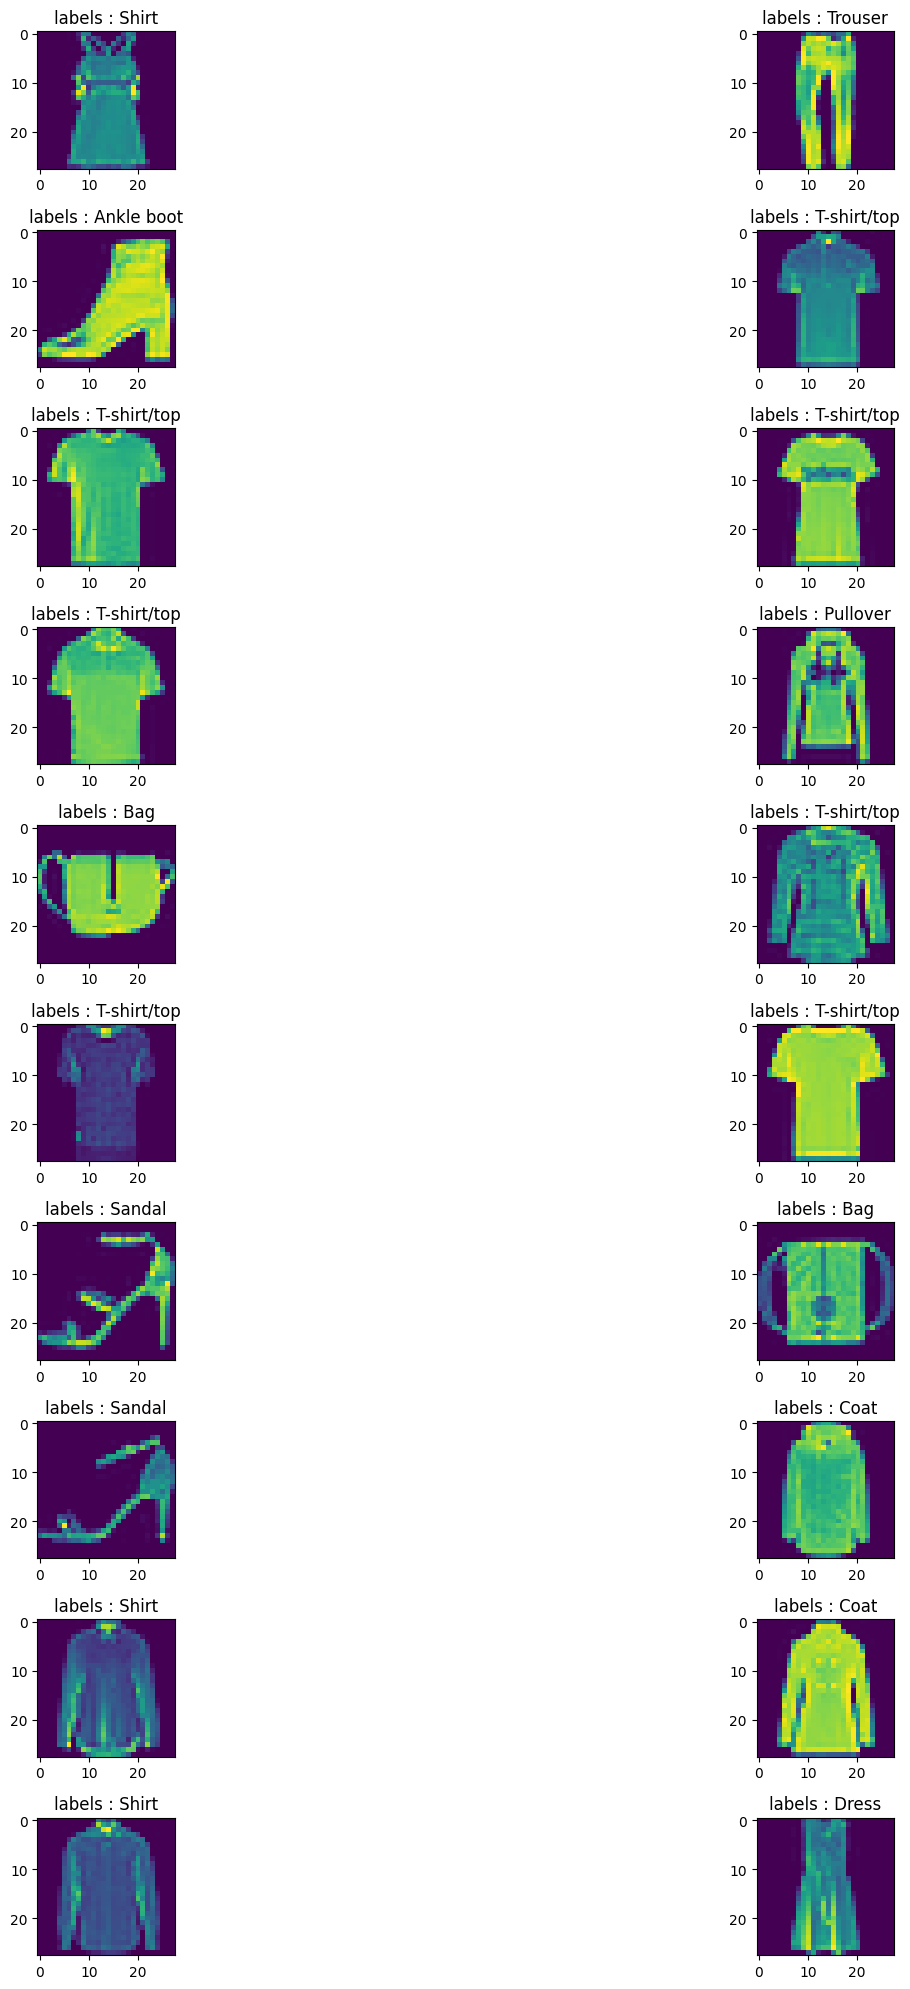

In [11]:
fig, ax = plt.subplots(len(class_n), 2)
fig.set_size_inches(20, 20)

for i in range(len(class_n)):
    for j in range(2):
        idx = random.randint(0, len(y_train))
        ax[i, j].imshow(x_train[idx])
        ax[i, j].set_title(f'labels : {labels[y_train[idx]]}')

plt.tight_layout()

In [12]:
# plt.subplot(1, 2, 1)
# sns.countplot(y_train)
# plt.title('classes_num of train')
# plt.set_xlabel('classes')

# plt.subplot(1, 2, 2)
# sns.countplot(y_test)
# plt.title('classes_num of test')
# plt.set_xlabel('classes')

# plt.show()

### Normalize & One-HotEncoding

In [13]:
# expand_dim

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [14]:
# MinMax Scaling

max_num = x_train.max() # 255
min_num = x_train.min() # 0

x_train = (x_train - min_num) / (max_num - min_num) # x_train / 255
x_test = (x_test - min_num) / (max_num - min_num) # x_train / 255

In [15]:
x_train.max(), x_train.min(), x_test.max(), x_test.min()

(1.0, 0.0, 1.0, 0.0)

## CNN Model

In [16]:
# clear_memory
clear_session()

# Sequential API
model = Sequential()

# Input Layer
model.add(Input(shape = (x_train.shape[1:])))

# Conv2D(32, (3, 3), 'same', 'relu)
model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu',
                 ))
# Pooling layer
model.add(MaxPool2D(pool_size = (2, 2)))
# Normalize layer
model.add(BatchNormalization())

# Conv2D(64, (3, 3), 'same', 'relu)
model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu',
                 ))
# Pooling layer
model.add(MaxPool2D(pool_size = (2, 2)))

# Normalize layer
model.add(BatchNormalization())

# Conv2D(128, (3, 3), 'same', 'relu)
model.add(Conv2D(filters = 128,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu',
                 ))
# Pooling layer
model.add(MaxPool2D(pool_size = (2, 2)))
# Normalize layer
model.add(BatchNormalization())

# Flatten Layer
model.add(Flatten())

# FC Layer

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 863,194 (3.29 MB)

 Trainable params: 860,730 (3.28 MB)

 Non-trainable params: 2,464 (9.62 KB)

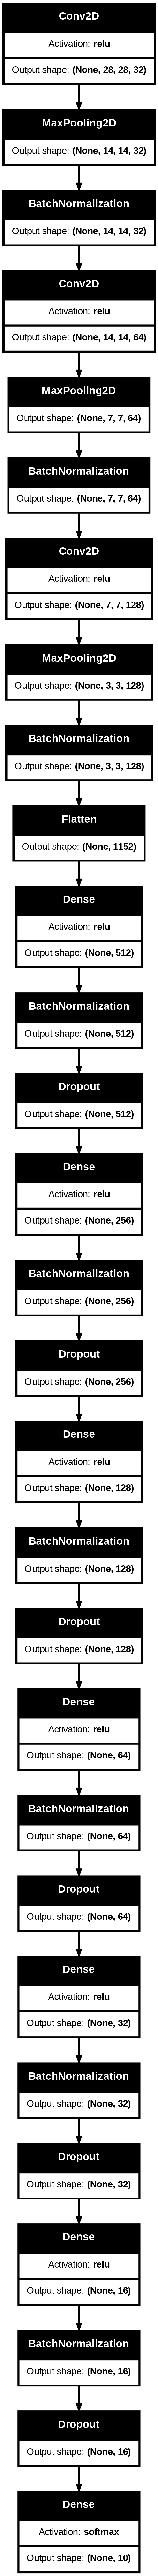

In [17]:
from keras.utils import plot_model

plot_model(model, show_shapes = True, show_layer_activations = True)

In [18]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

history = model.fit(x_train, y_train, epochs = 100, validation_split = 0.2, callbacks = [es], batch_size = 128)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - accuracy: 0.5899 - loss: 1.3182 - val_accuracy: 0.3028 - val_loss: 2.5154
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8549 - loss: 0.4922 - val_accuracy: 0.8543 - val_loss: 0.4387
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8845 - loss: 0.3840 - val_accuracy: 0.8835 - val_loss: 0.3505
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9009 - loss: 0.3226 - val_accuracy: 0.9028 - val_loss: 0.2903
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9143 - loss: 0.2887 - val_accuracy: 0.8692 - val_loss: 0.4136
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9190 - loss: 0.2624 - val_accuracy: 0.9014 - val_loss: 0.3205
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9276 - loss: 0.2393 - val_accuracy: 0.8671 - val_loss: 0.5130
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9355 - loss: 0.2129 - val_a

Text(0.5, 1.0, 'Loss Curves')

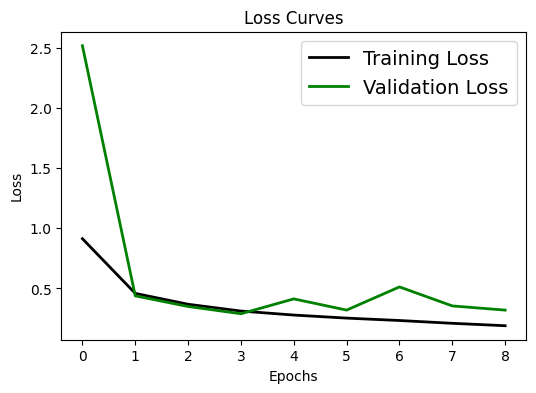

In [19]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

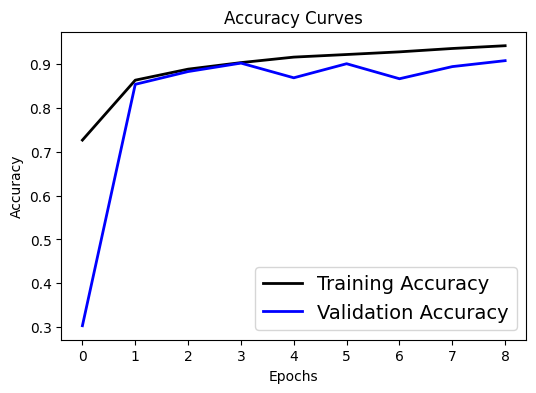

In [20]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [21]:
train_cnn_pred = model.predict(x_train)
test_cnn_pred = model.predict(x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [22]:
train_cnn_pred = train_cnn_pred.argmax(axis = 1)
test_cnn_pred = test_cnn_pred.argmax(axis = 1)

In [23]:
train_cnn_accuracy = accuracy_score(y_train, train_cnn_pred)
test_cnn_accuracy = accuracy_score(y_test, test_cnn_pred)

print("train_CNN_ccuracy :", train_cnn_accuracy)
print("test_CNN_ccuracy :", test_cnn_accuracy)

train_CNN_ccuracy : 0.9232666666666667
test_CNN_ccuracy : 0.9009


## CNN filters + ml

In [24]:
cnn_features_model = Model(inputs = model.inputs, outputs = model.layers[-20].output)

In [25]:
cnn_features_train = cnn_features_model.predict(x_train)
cnn_features_test = cnn_features_model.predict(x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
cnn_features_train.shape, cnn_features_test.shape

((60000, 1152), (10000, 1152))

#### CNN filters + LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(cnn_features_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
train_lr_accuracy = lr_model.score(cnn_features_train, y_train)
test_lr_accuracy = lr_model.score(cnn_features_test, y_test)

print("train_lr_ccuracy :", train_lr_accuracy)
print("test_lr_ccuracy :", test_lr_accuracy)

train_lr_ccuracy : 0.9576
test_lr_ccuracy : 0.9135


#### CNN filters + KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier()

kn_model.fit(cnn_features_train, y_train)

KNeighborsClassifier()

In [30]:
train_kn_accuracy = kn_model.score(cnn_features_train, y_train)
test_kn_accuracy = kn_model.score(cnn_features_test, y_test)

print("train_lr_ccuracy :", train_kn_accuracy)
print("test_lr_ccuracy :", test_kn_accuracy)

train_lr_ccuracy : 0.9388833333333333
test_lr_ccuracy : 0.9034


#### CNN filters + RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(cnn_features_train, y_train)

RandomForestClassifier()

In [32]:
train_rf_accuracy = rf_model.score(cnn_features_train, y_train)
test_rf_accuracy = rf_model.score(cnn_features_test, y_test)

print("train_rf_ccuracy :", train_rf_accuracy)
print("test_rf_ccuracy :", test_rf_accuracy)

train_rf_ccuracy : 1.0
test_rf_ccuracy : 0.8983


#### CNN filters + LightGBM

In [33]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()

lgbm_model.fit(cnn_features_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.646772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293760
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 1152
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585


LGBMClassifier()

In [34]:
train_lgbm_accuracy = lgbm_model.score(cnn_features_train, y_train)
test_lgbm_accuracy = lgbm_model.score(cnn_features_test, y_test)

print("train_lgbm_ccuracy :", train_lgbm_accuracy)
print("test_lgbm_ccuracy :", test_lgbm_accuracy)

train_lgbm_ccuracy : 0.9998333333333334
test_lgbm_ccuracy : 0.9158


In [35]:
print("--Training Accuracy--")
print("CNN Accuracy:- {:.2f} %".format(train_cnn_accuracy * 100))
print("CNN+LogisticRegression Accuracy:- {:.2f} %".format(train_lr_accuracy * 100))
print("CNN+KNN Accuracy:- {:.2f} %".format(train_kn_accuracy * 100))
print("CNN+RandomForest Accuracy:- {:.2f} %".format(train_rf_accuracy * 100))
print("CNN+LightGBM Accuracy:- {:.2f} %".format(train_lgbm_accuracy * 100))
print(' ')
print("--Testing Accuracy--")
print("CNN Accuracy:- {:.2f} %".format(test_cnn_accuracy * 100))
print("CNN+LogisticRegression Accuracy:- {:.2f} %".format(test_lr_accuracy * 100))
print("CNN+KNN Accuracy:- {:.2f} %".format(test_kn_accuracy * 100))
print("CNN+RandomForest Accuracy:- {:.2f} %".format(test_rf_accuracy * 100))
print("CNN+LightGBM Accuracy:- {:.2f} %".format(test_lgbm_accuracy * 100))

--Training Accuracy--
CNN Accuracy:- 92.33 %
CNN+LogisticRegression Accuracy:- 95.76 %
CNN+KNN Accuracy:- 93.89 %
CNN+RandomForest Accuracy:- 100.00 %
CNN+LightGBM Accuracy:- 99.98 %
 
--Testing Accuracy--
CNN Accuracy:- 90.09 %
CNN+LogisticRegression Accuracy:- 91.35 %
CNN+KNN Accuracy:- 90.34 %
CNN+RandomForest Accuracy:- 89.83 %
CNN+LightGBM Accuracy:- 91.58 %
